In [13]:
import h5py
import pandas as pd
import numpy as np

local_path = './Site_Adamstown_Solar_solar_actuals_2018.h5'
with h5py.File(local_path, 'r') as f:
    df_meta = pd.DataFrame(f['meta'][...])
    time_index = pd.to_datetime(f['time_index'][...].astype(str))
    solar_actuals = f['actuals'][...]

In [14]:
time_index

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:10:00+00:00', '2018-01-01 00:15:00+00:00',
               '2018-01-01 00:20:00+00:00', '2018-01-01 00:25:00+00:00',
               '2018-01-01 00:30:00+00:00', '2018-01-01 00:35:00+00:00',
               '2018-01-01 00:40:00+00:00', '2018-01-01 00:45:00+00:00',
               ...
               '2018-12-31 23:10:00+00:00', '2018-12-31 23:15:00+00:00',
               '2018-12-31 23:20:00+00:00', '2018-12-31 23:25:00+00:00',
               '2018-12-31 23:30:00+00:00', '2018-12-31 23:35:00+00:00',
               '2018-12-31 23:40:00+00:00', '2018-12-31 23:45:00+00:00',
               '2018-12-31 23:50:00+00:00', '2018-12-31 23:55:00+00:00'],
              dtype='datetime64[ns, UTC]', length=105120, freq=None)

In [31]:
dataset = pd.DataFrame({'hours': solar_actuals})
print(type(dataset['hours'][0][0]))
print(dataset['hours'][0][0])
print(type(solar_actuals[0][0]))

<class 'float'>
0.0
<class 'numpy.float64'>


In [37]:
s_act_l = []
for i in range(105120):
    s_act_l.append(solar_actuals[i][0])
s_act = np.asarray(s_act_l)

In [53]:
s_act_hours = s_act.reshape((8760,12)).sum(axis=1)
s_hours = s_act_hours.reshape((365,24)).sum(axis=0)
s_hours = s_hours/365
s_hours = s_hours.reshape((1,24))
print(s_hours)

[[ 296.35958904   19.05565068    0.            0.            0.
     0.            0.            0.            0.            0.
     0.           12.08818493  241.84246575  803.00256849 1410.43321918
  1810.45719178 1905.37842466 1952.27140411 1958.65410959 1960.0890411
  1946.9734589  1875.9135274  1583.375       928.77311644]]


In [55]:
#dataset2 = pd.DataFrame({'hours': s_hours})
columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
df = pd.DataFrame(data=s_hours, columns=columns)
print(df)

            0          1    2    3    4    5    6    7    8    9  ...  \
0  296.359589  19.055651  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

            14           15           16           17          18  \
0  1410.433219  1810.457192  1905.378425  1952.271404  1958.65411   

            19           20           21        22          23  
0  1960.089041  1946.973459  1875.913527  1583.375  928.773116  

[1 rows x 24 columns]


In [59]:
print(df_meta['latitude'])

0    33.25
Name: latitude, dtype: float64


In [60]:
df = pd.concat([df,df_meta['latitude'],df_meta['longitude']], axis=1)
print(df)

            0          1    2    3    4    5    6    7    8    9  ...  \
0  296.359589  19.055651  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

            16           17          18           19           20  \
0  1905.378425  1952.271404  1958.65411  1960.089041  1946.973459   

            21        22          23  latitude  longitude  
0  1875.913527  1583.375  928.773116     33.25     -97.26  

[1 rows x 26 columns]


In [134]:
import os

directory = os.fsencode('/Users/Rakene/Documents/Academics/280/ML-Energy-Capstone/ERCOT/data/solar')
l_path = './data/solar/'
columns = ['t0','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23']
columns2 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dfs = []
dfs2 = []
i=0

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    with h5py.File(l_path+filename, 'r') as f:
        df_meta = pd.DataFrame(f['meta'][...])
        solar_actuals = f['actuals'][...]
    s_act_l = []
    for i in range(105120):
        s_act_l.append(solar_actuals[i][0])
    s_act = np.asarray(s_act_l)
    s_months = s_act.reshape((12,8760)).sum(axis=1)
    s_months = s_months/730
    s_months = s_months.reshape((1,12))
    s_act_hours = s_act.reshape((8760,12)).sum(axis=1)
    s_hours = s_act_hours.reshape((365,24)).sum(axis=0)
    s_hours = s_hours/365
    s_hours = s_hours.reshape((1,24))
    df = pd.DataFrame(data=s_hours, columns=columns)
    df = pd.concat([df,df_meta['latitude'],df_meta['longitude']], axis=1)
    df = df.rename(index={0:i})
    dfs.append(df)
    df2 = pd.DataFrame(data=s_months, columns=columns2)
    df2 = pd.concat([df2,df_meta['latitude'],df_meta['longitude']], axis=1)
    df2 = df2.rename(index={0:i})
    dfs2.append(df2)
    i += 1

s_actuals = pd.concat(dfs)
s_actuals_m = pd.concat(dfs2)
    
    

In [135]:
directory = os.fsencode('/Users/Rakene/Documents/Academics/280/ML-Energy-Capstone/ERCOT/data/wind')
l_path = './data/wind/'
dfw = []
dfw2 = []
i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    with h5py.File(l_path+filename, 'r') as f:
        df_meta = pd.DataFrame(f['meta'][...])
        wind_actuals = f['actuals'][...]
    #w_act_l = []
    #for i in range(105120):
    #    w_act_l.append(wind_actuals[i][0])
    #w_act = np.asarray(w_act_l)
    w_months = wind_actuals.reshape((12,8760)).sum(axis=1)
    w_months = w_months/730
    w_months = w_months.reshape((1,12))
    w_act_hours = wind_actuals.reshape((8760,12)).sum(axis=1)
    w_hours = w_act_hours.reshape((365,24)).sum(axis=0)
    w_hours = w_hours/365
    w_hours = w_hours.reshape((1,24))
    df = pd.DataFrame(data=w_hours, columns=columns)
    df = pd.concat([df,df_meta['latitude'],df_meta['longitude']], axis=1)
    df = df.rename(index={0:i})
    dfw.append(df)
    df2 = pd.DataFrame(data=w_months, columns=columns2)
    df2 = pd.concat([df2,df_meta['latitude'],df_meta['longitude']], axis=1)
    df2 = df2.rename(index={0:i})
    dfw2.append(df2)
    i +=1

w_actuals = pd.concat(dfw)
w_actuals_m = pd.concat(dfw2)
#print(w_actuals)

In [97]:
print(type(w_actuals.loc[0]))

<class 'pandas.core.series.Series'>


In [106]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
texas = gpd.read_file('/Users/Rakene/Documents/Academics/280/ERCOT/Texas_Map/tl_2016_48_cousub.shp')

In [136]:
s_geometry = [Point(xy) for xy in zip(s_actuals['longitude'], s_actuals['latitude'])]
geo_solar = gpd.GeoDataFrame(s_actuals, geometry = s_geometry)
#print(geo_wind_real.head())

w_geometry = [Point(xy) for xy in zip(w_actuals['longitude'], w_actuals['latitude'])]
geo_wind = gpd.GeoDataFrame(w_actuals, geometry = w_geometry)
#geo_solar_real.head()

/Users/Rakene/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


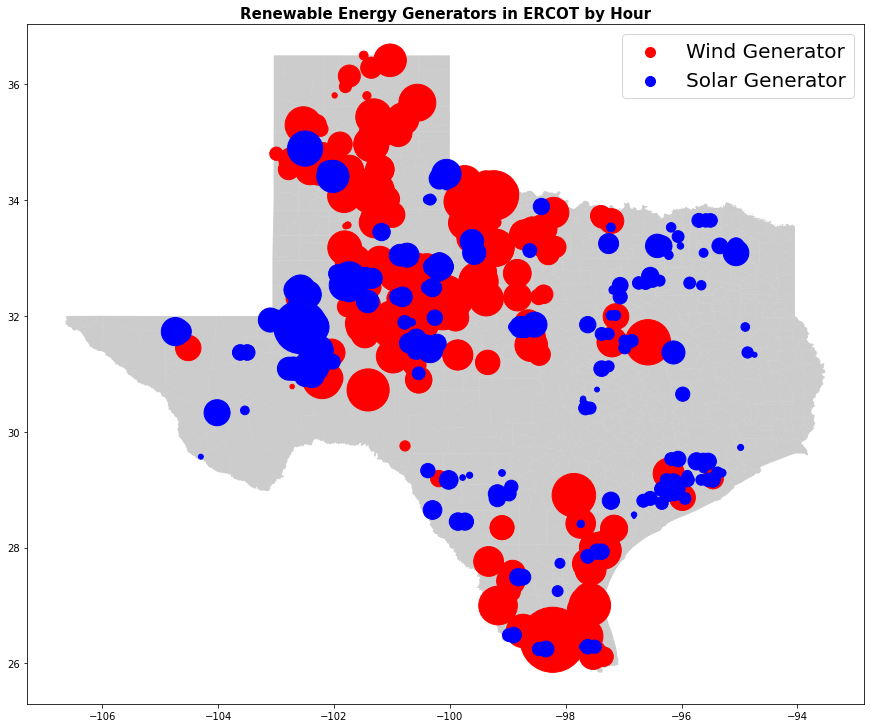

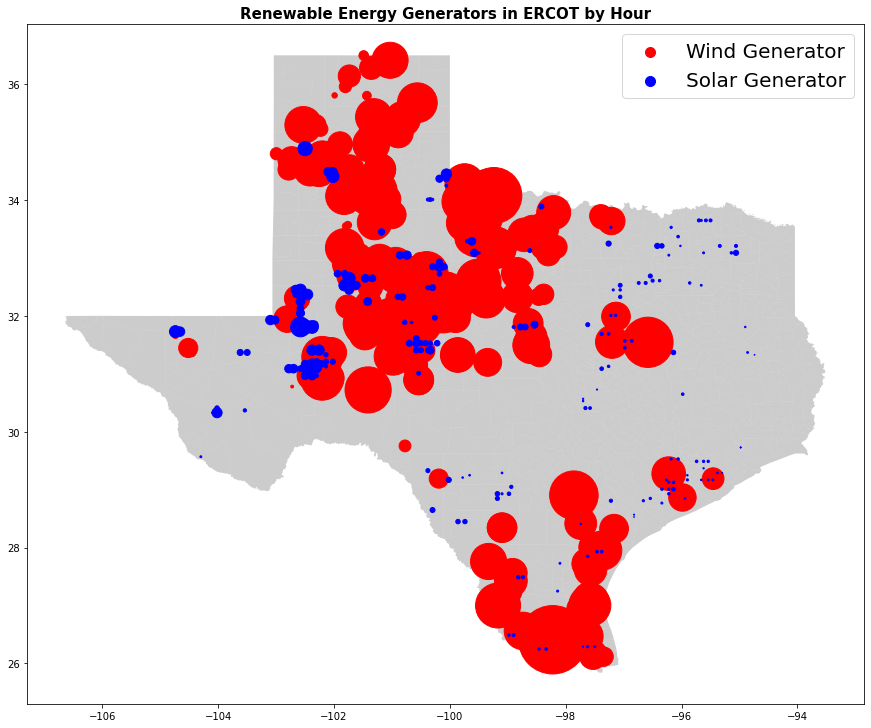

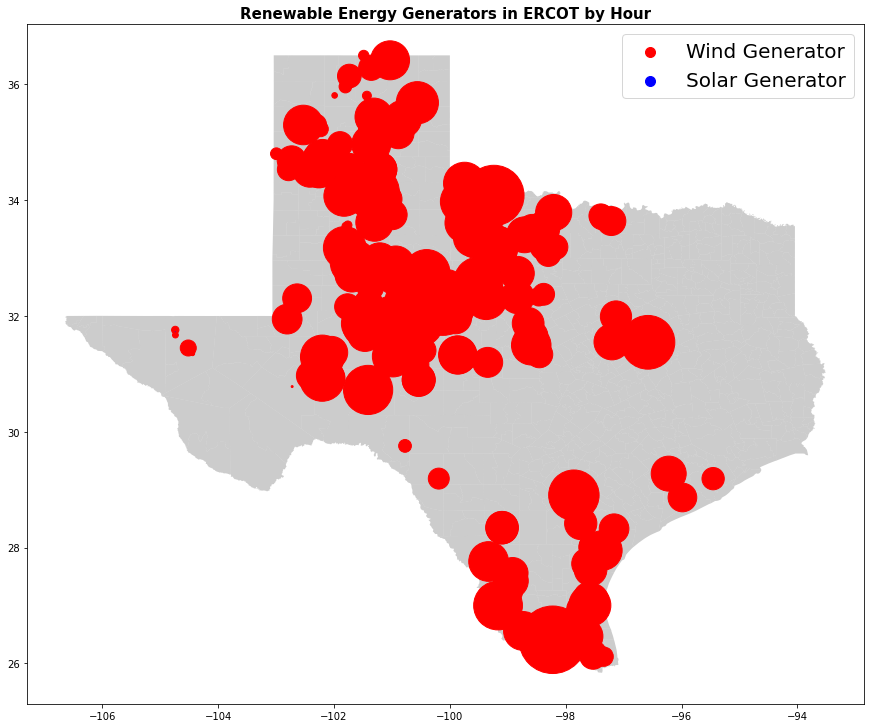

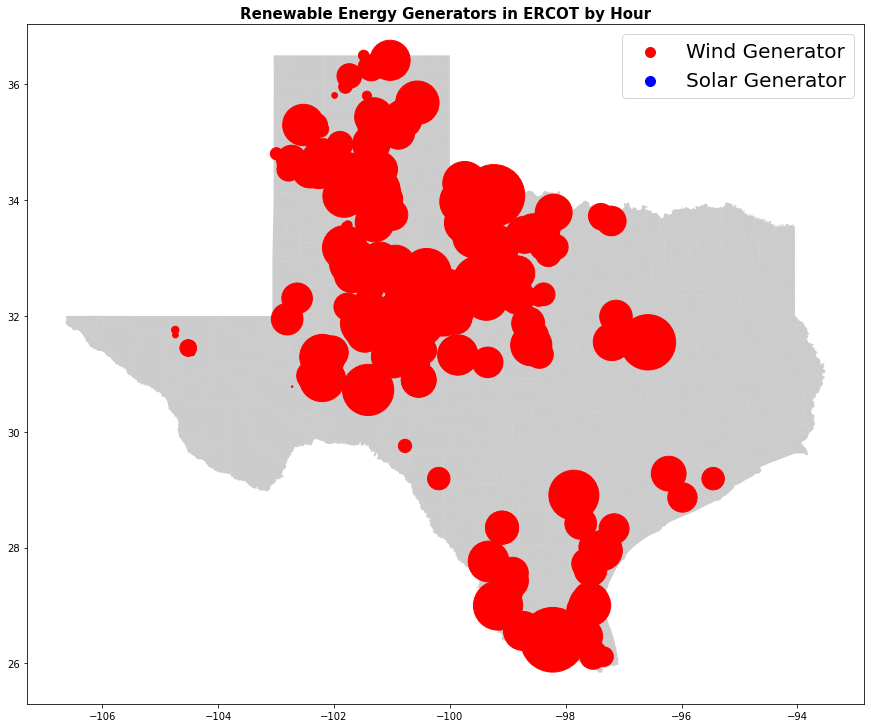

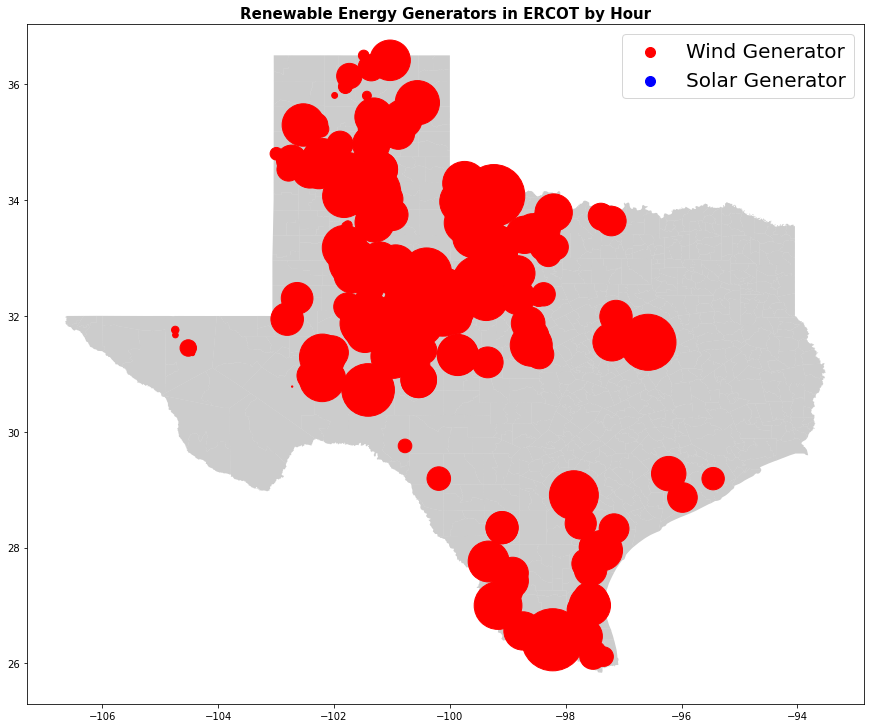

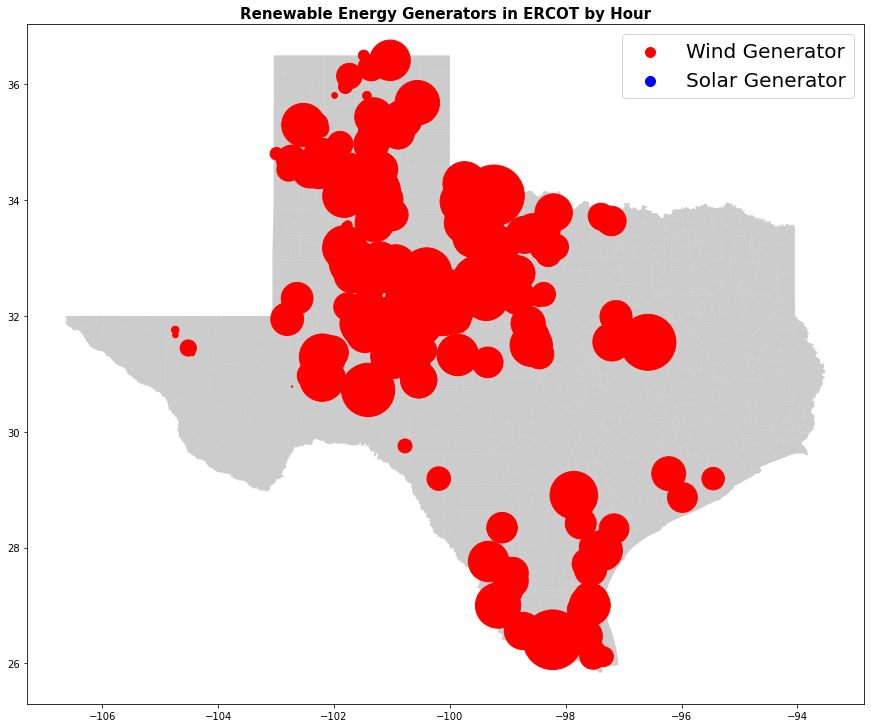

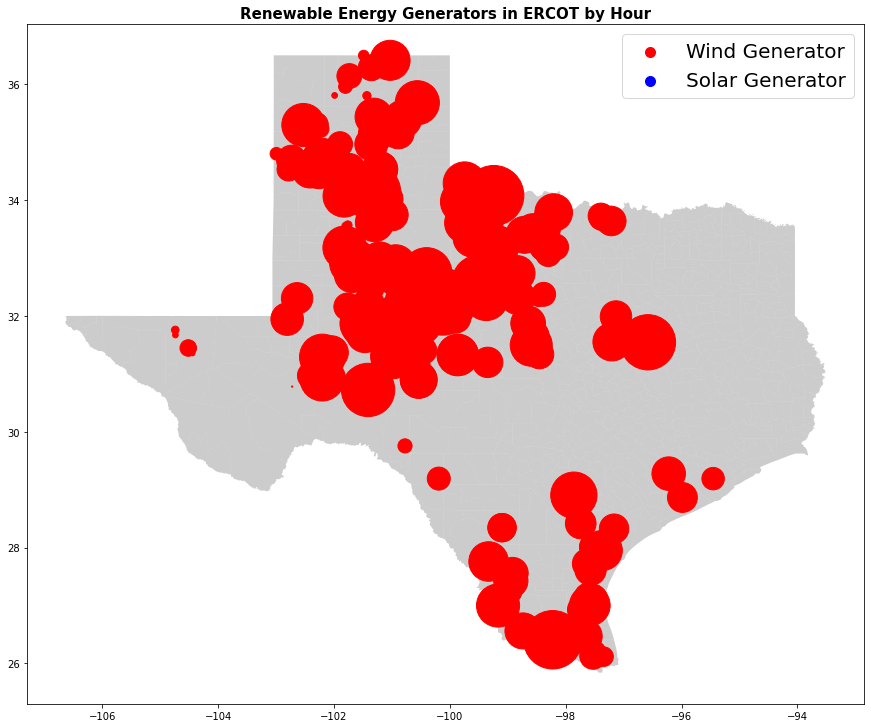

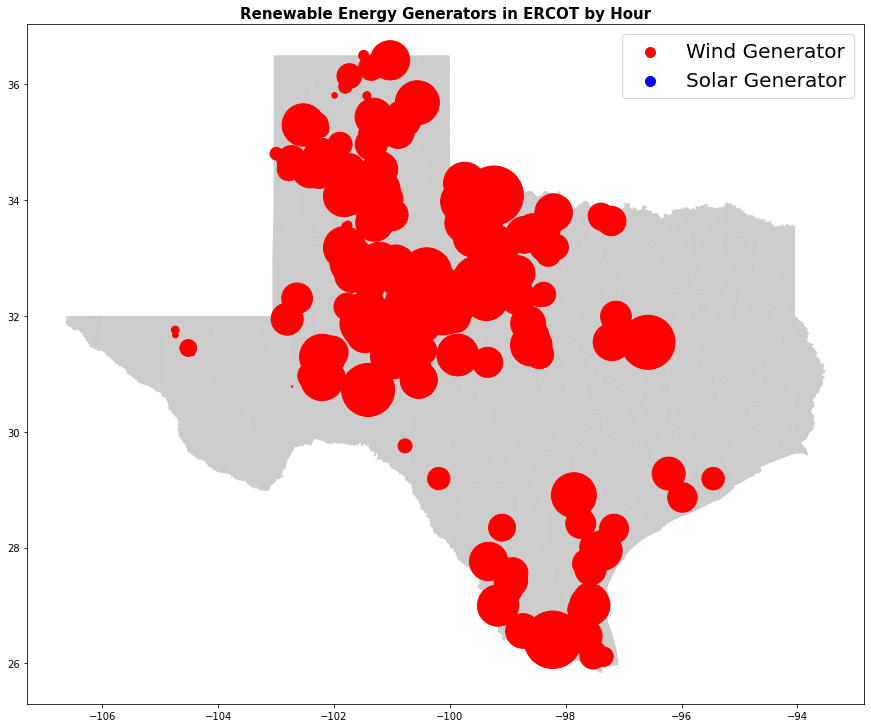

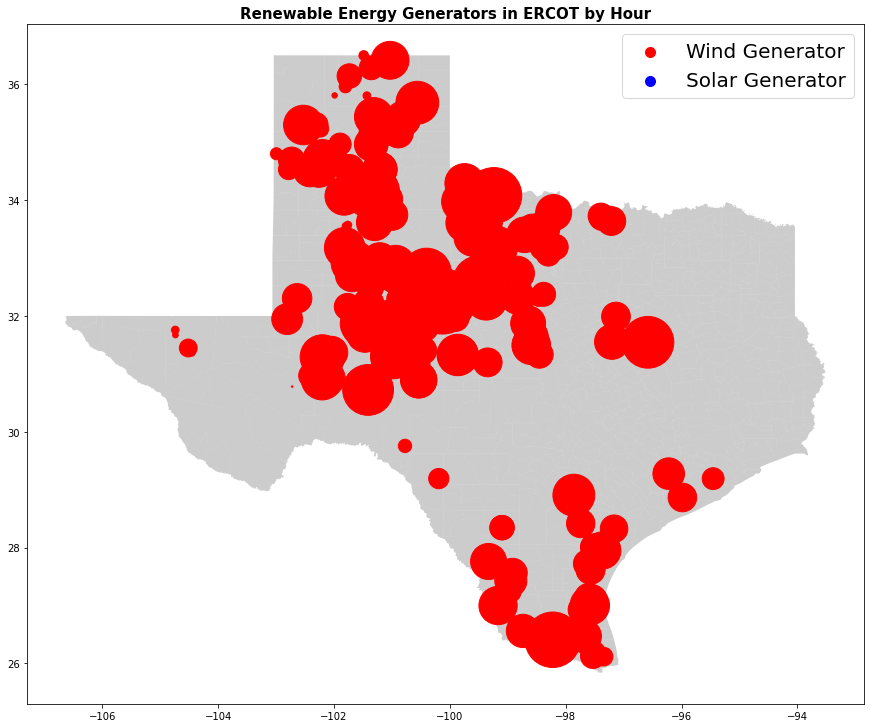

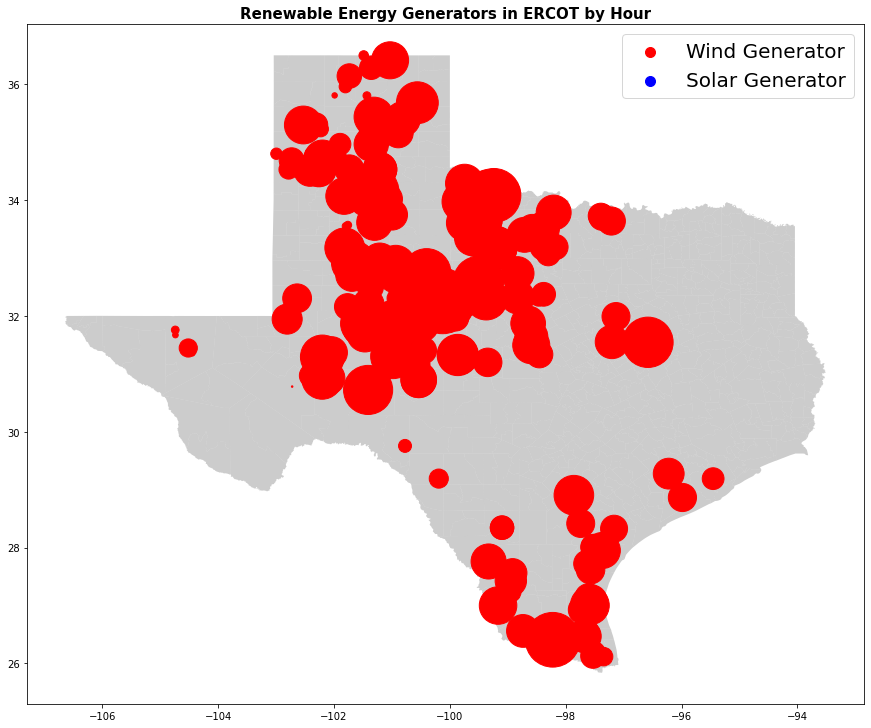

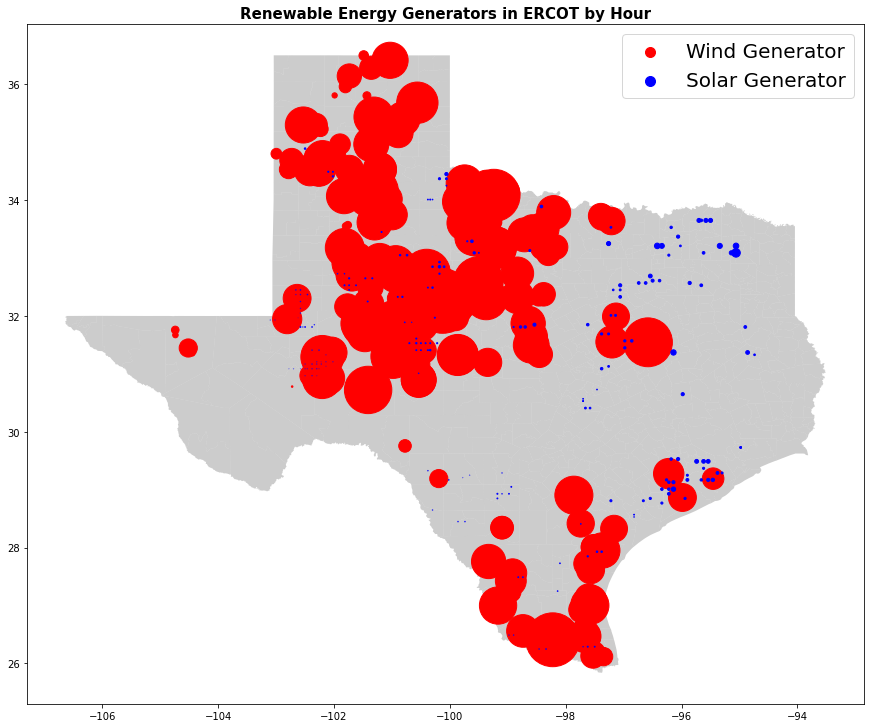

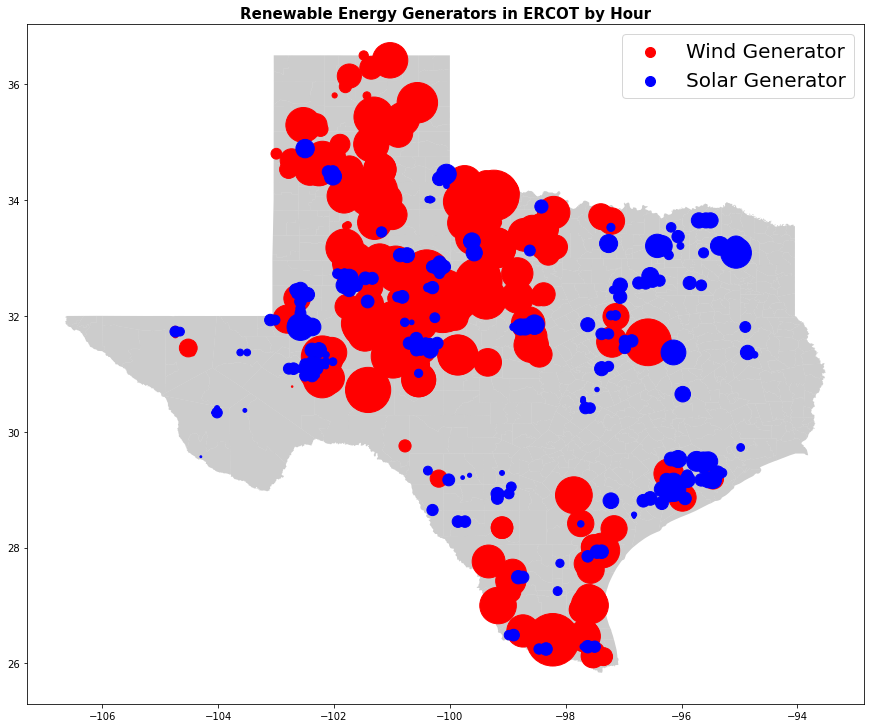

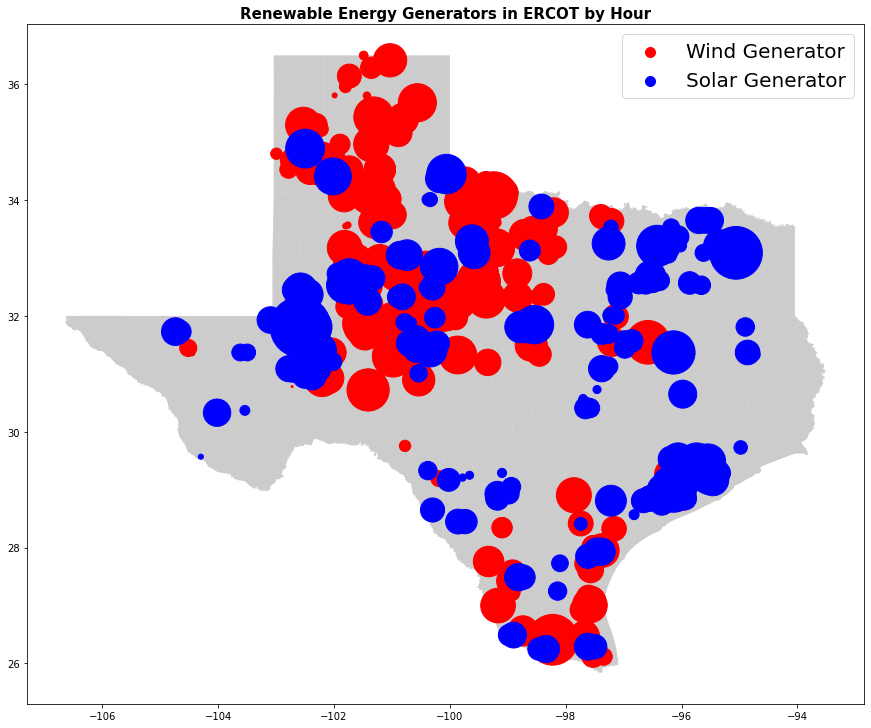

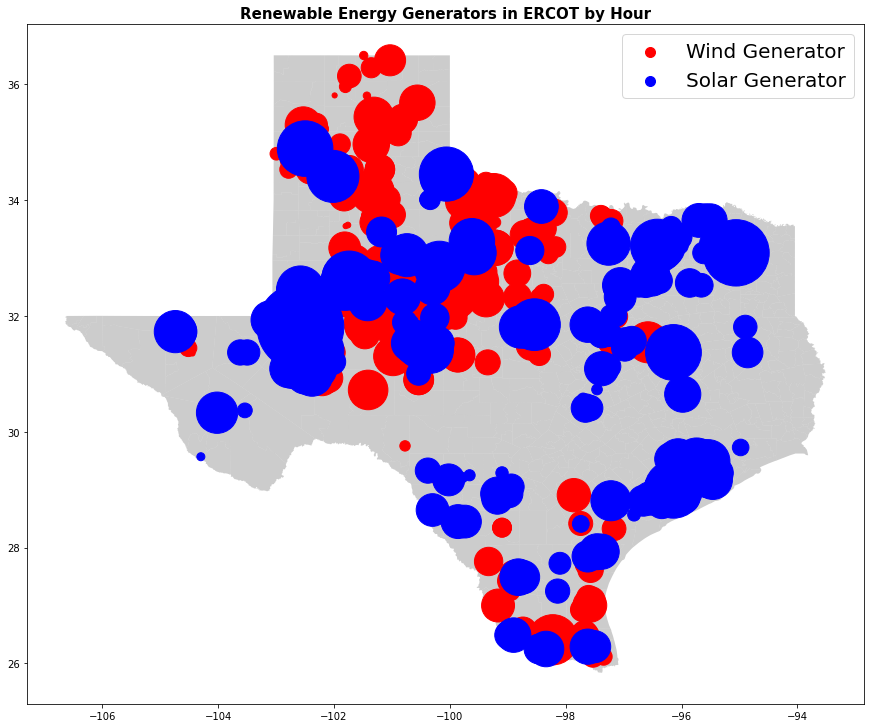

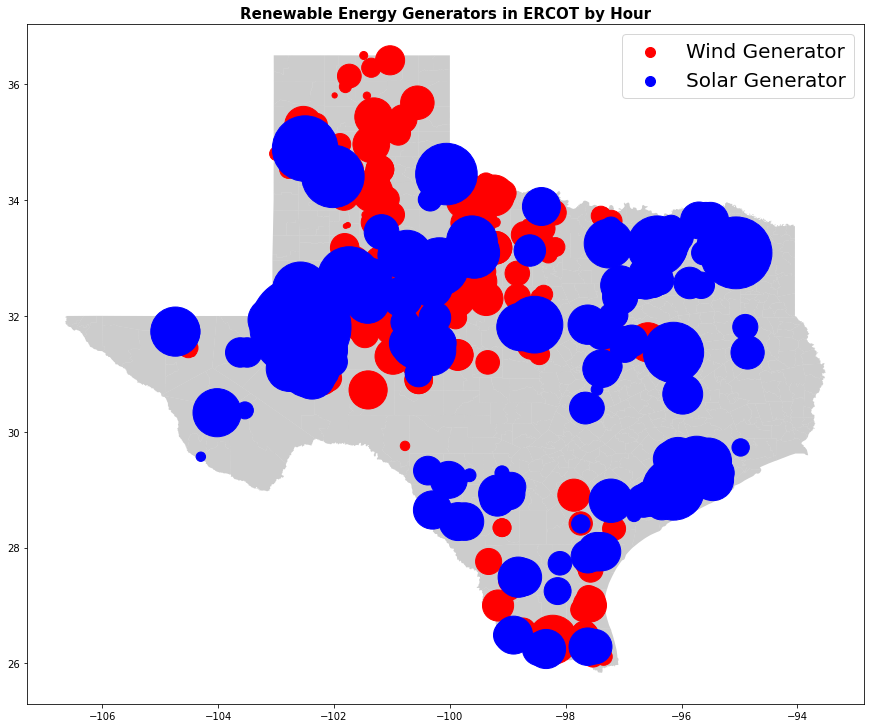

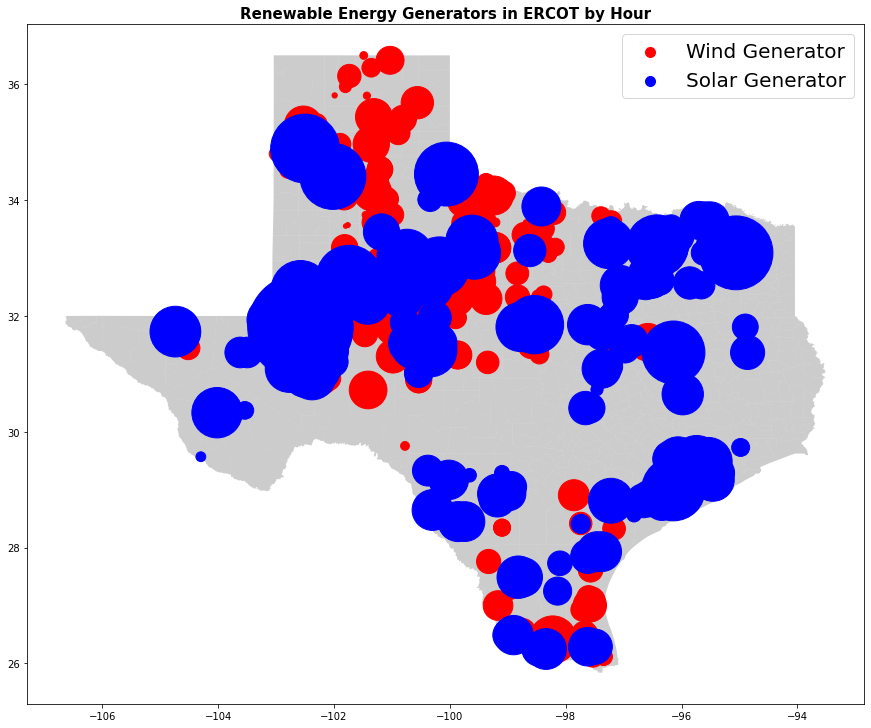

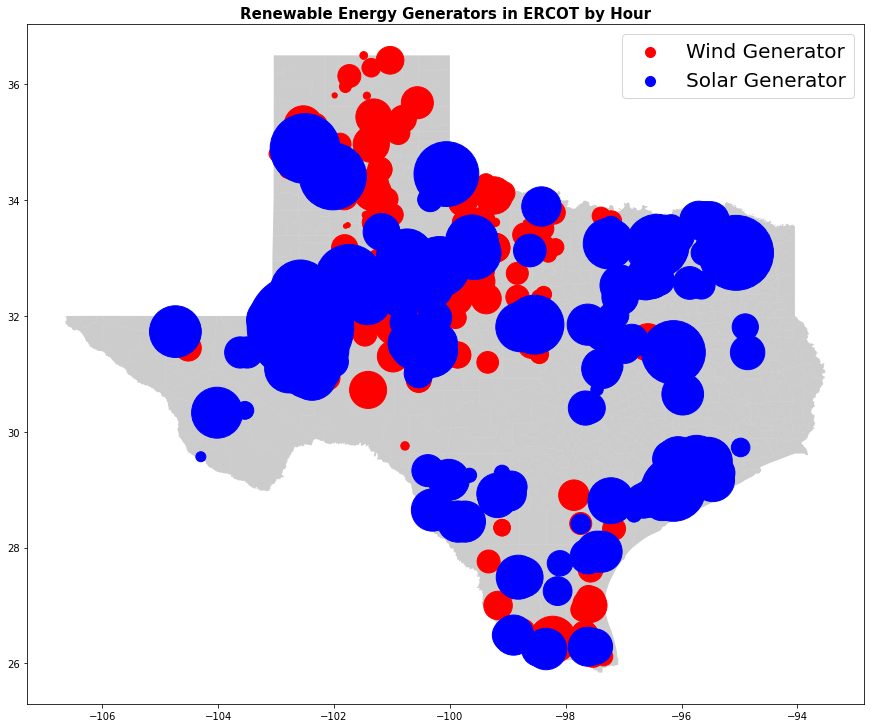

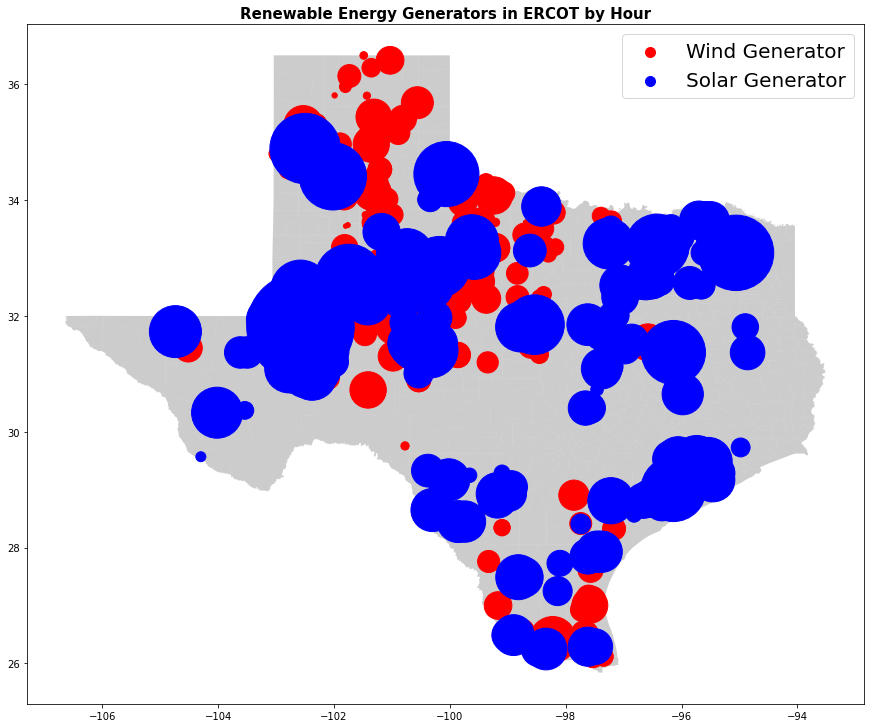

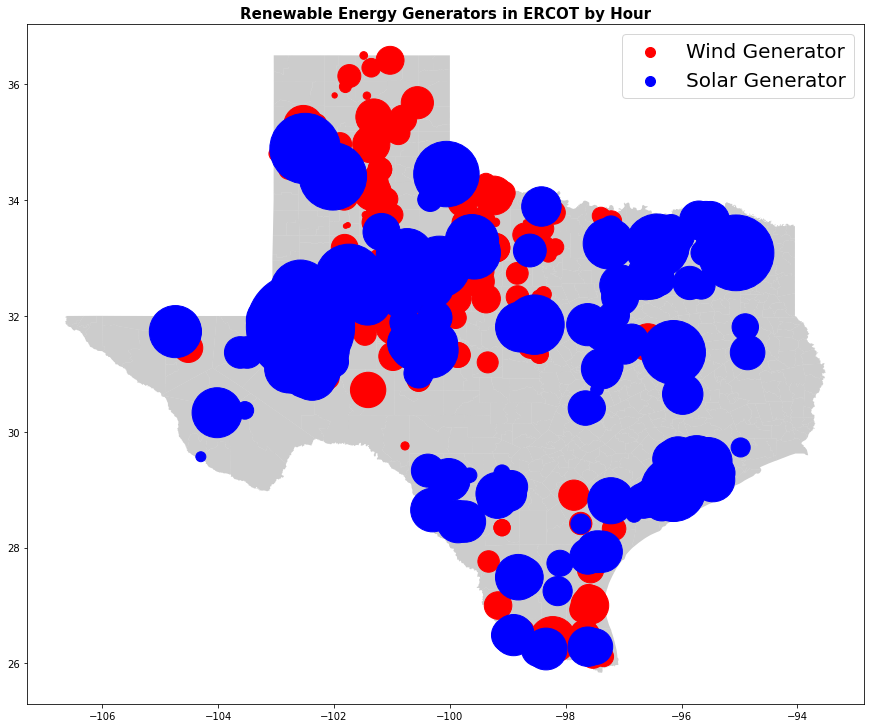

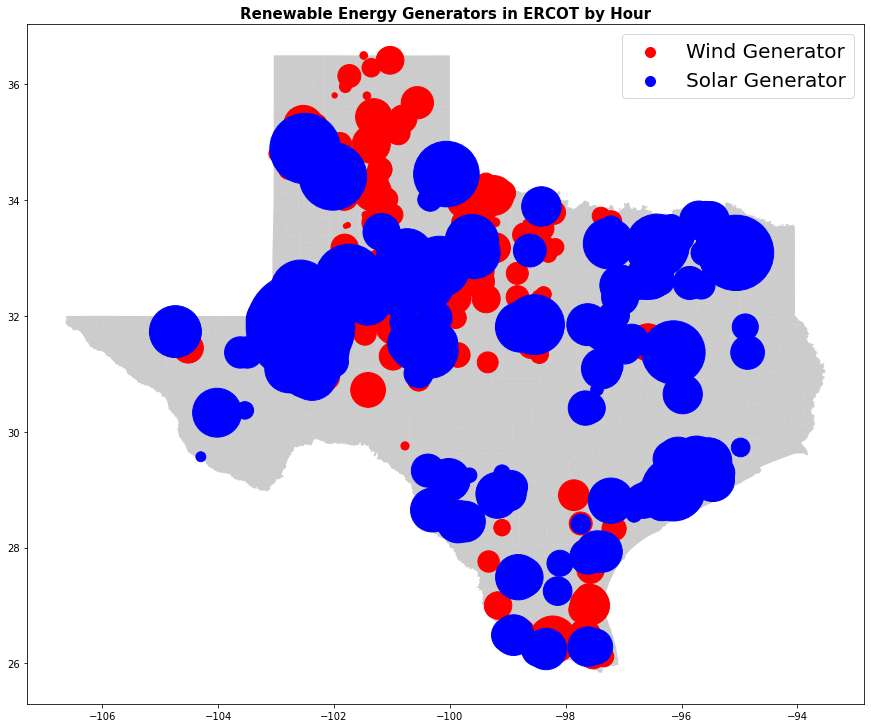

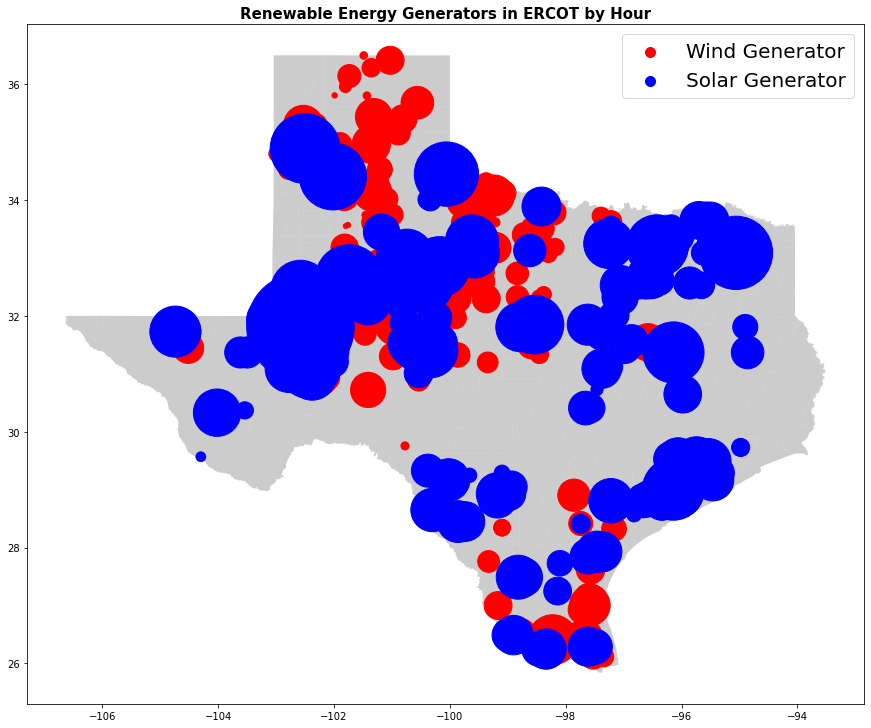

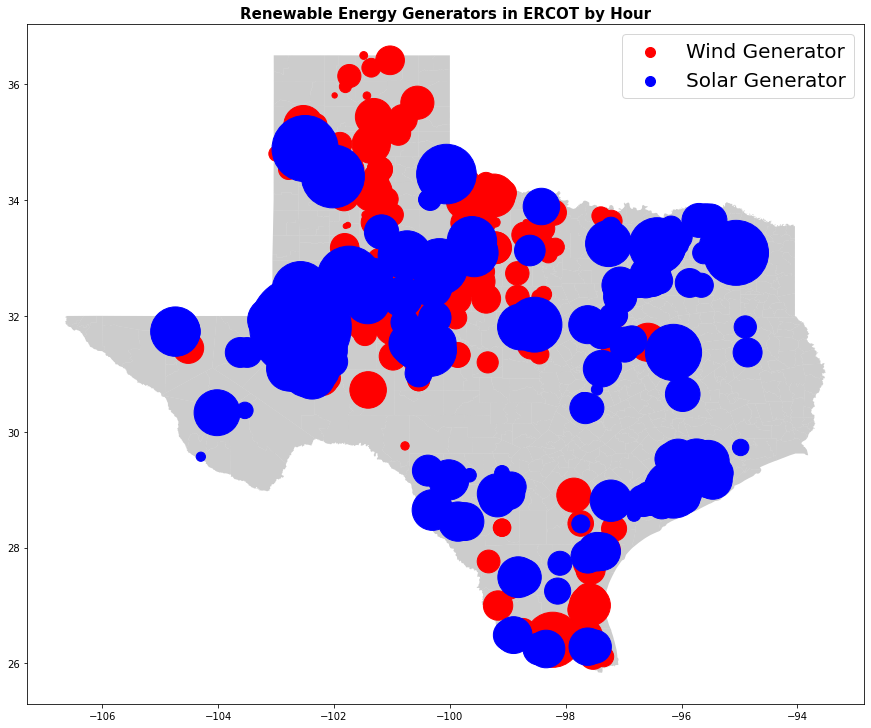

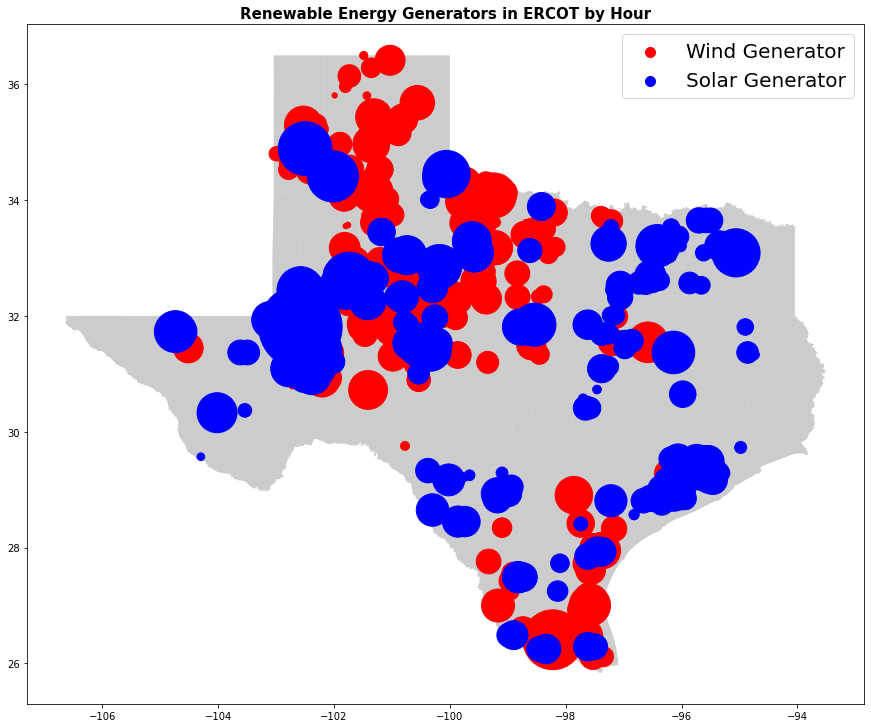

In [137]:
png = ".png"
for column in columns:
    
    fig, ax = plt.subplots(figsize = (15,15))
    texas.plot(ax = ax, alpha = 0.4, color="grey")

    geo_wind.plot(ax=ax, marker='o', color='red', markersize=geo_wind[column], label="Wind Generator")
    geo_solar.plot(ax=ax, marker='o', color='blue', markersize=geo_solar[column], label="Solar Generator")

    plt.title('Renewable Energy Generators in ERCOT by Hour', fontsize=15,fontweight='bold')


    #geo_wind_real['geometry'].plot(ax = ax, markersize = 20, color = "blue", marker="o", label= "Existing Wind Generator")
    #plt.legend(prop={'size':15})
    lgnd = plt.legend(scatterpoints=1, fontsize=20)
    for handle in lgnd.legendHandles:
        handle.set_sizes([100.0])
    plt.savefig(column+png)
#plt.show()

In [138]:
s_geometry1 = [Point(xy) for xy in zip(s_actuals['longitude'], s_actuals['latitude'])]
geo_solar1 = gpd.GeoDataFrame(s_actuals_m, geometry = s_geometry1)
#print(geo_wind_real.head())

w_geometry1 = [Point(xy) for xy in zip(w_actuals['longitude'], w_actuals['latitude'])]
geo_wind1 = gpd.GeoDataFrame(w_actuals_m, geometry = w_geometry1)
#geo_solar_real.head()

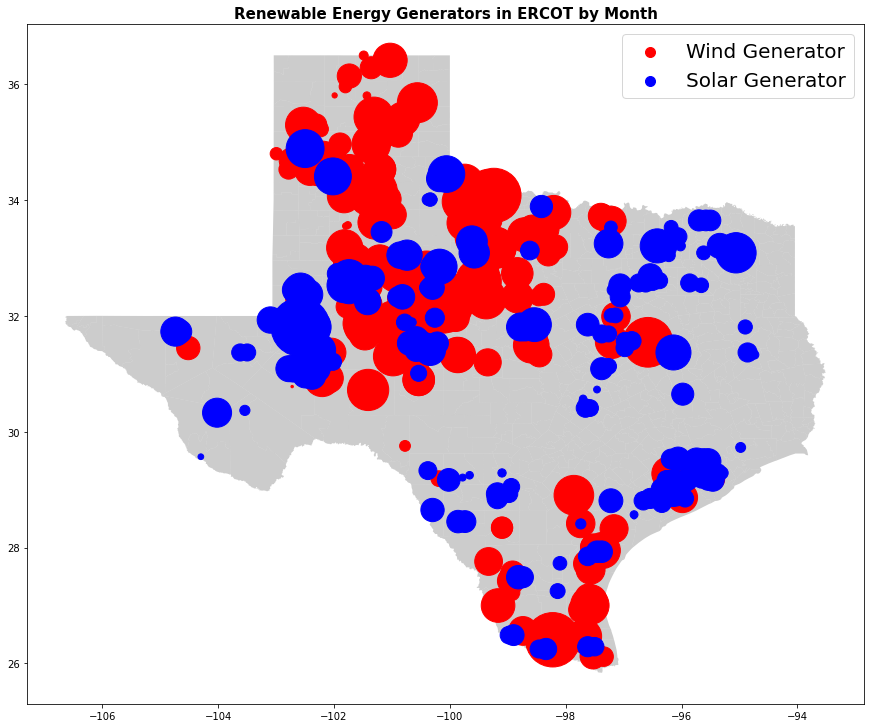

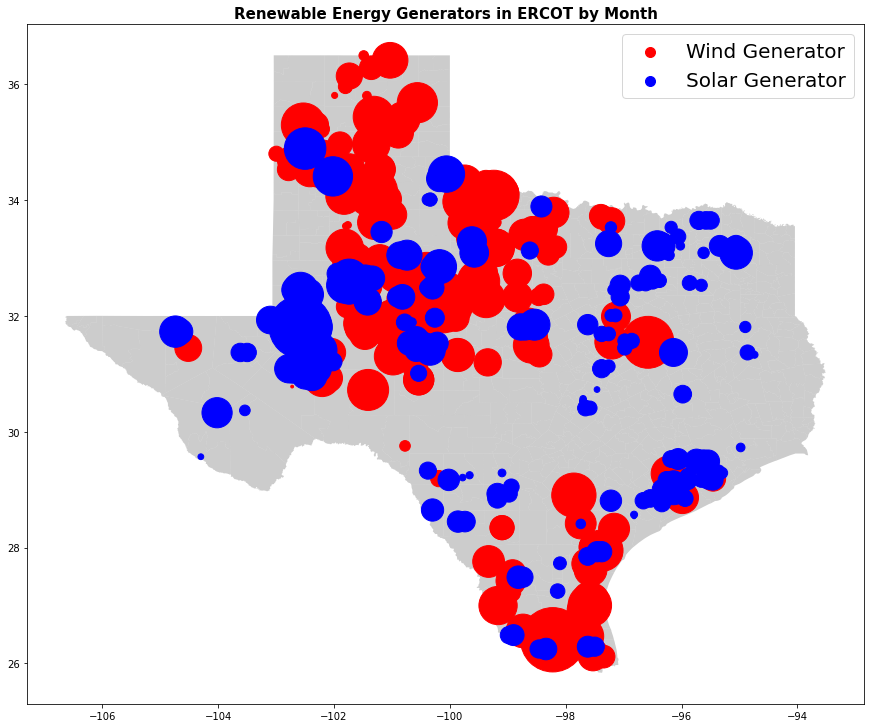

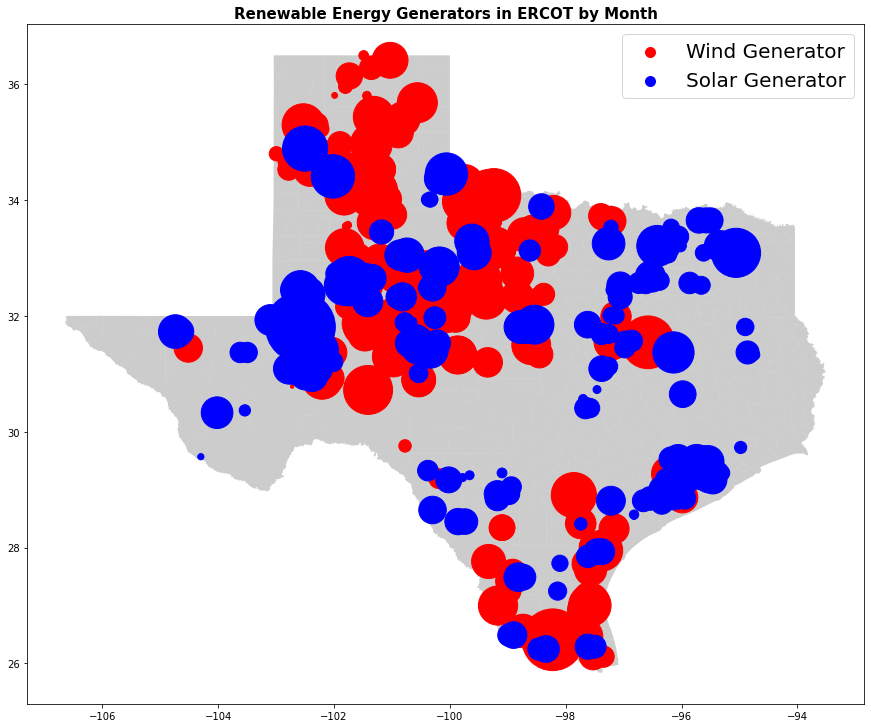

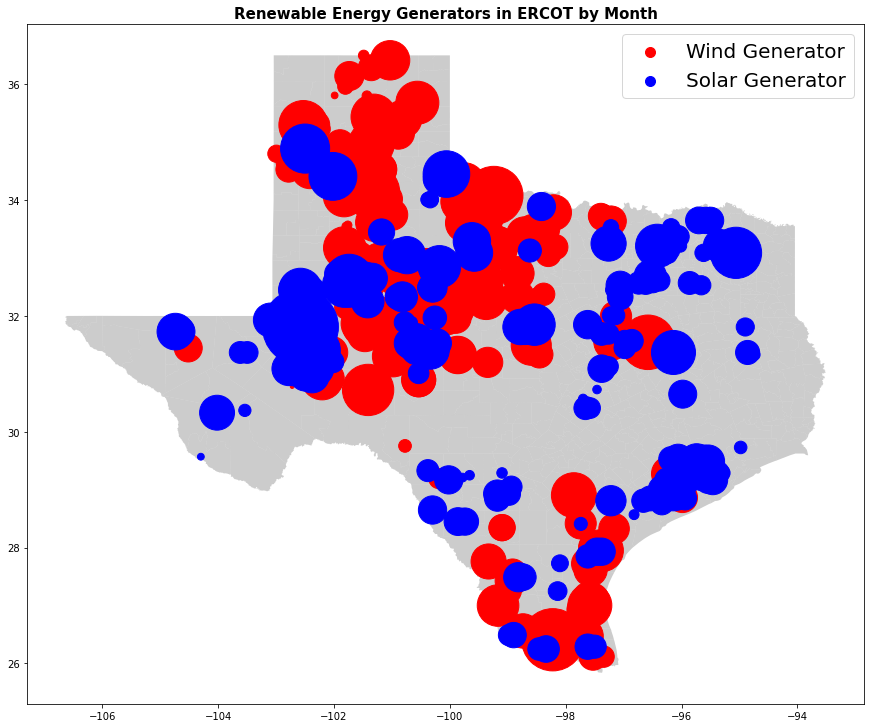

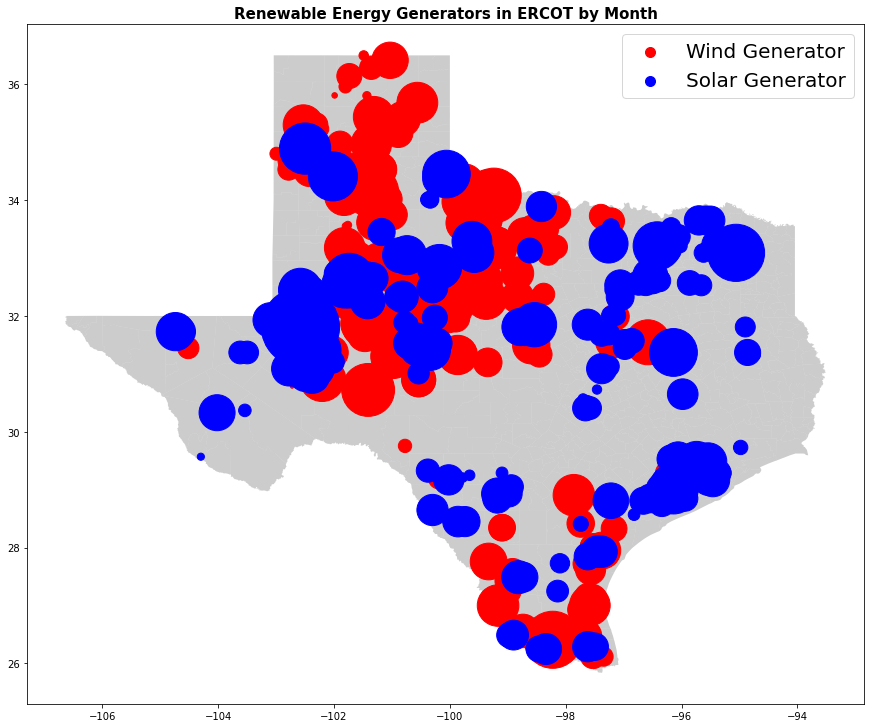

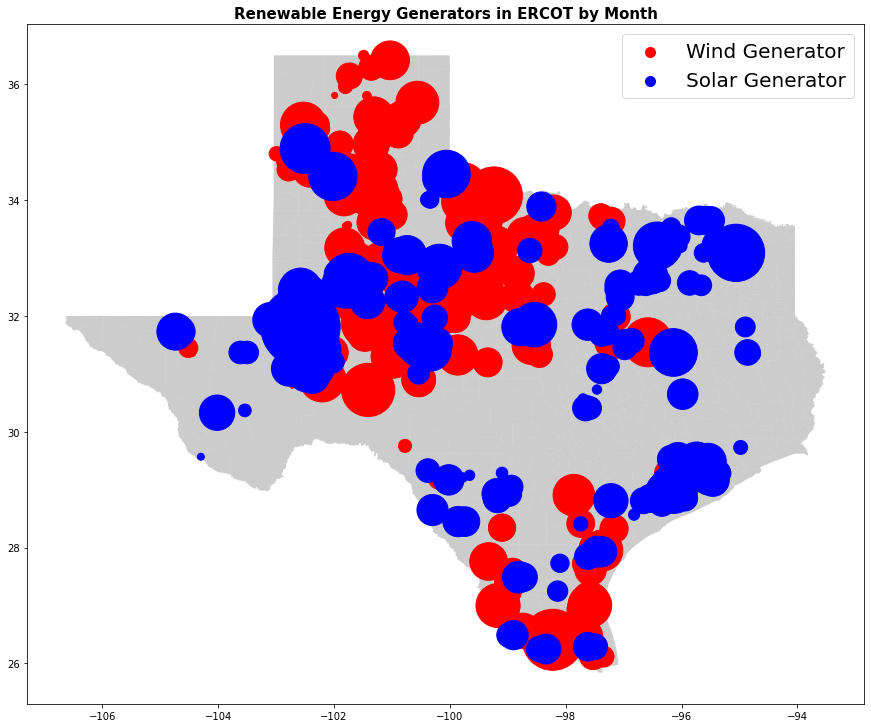

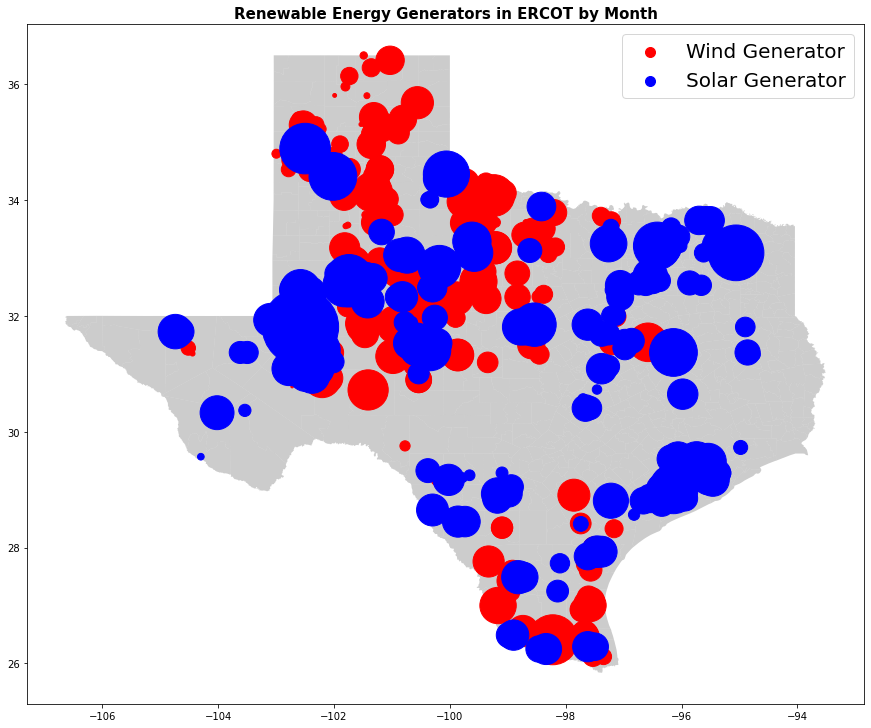

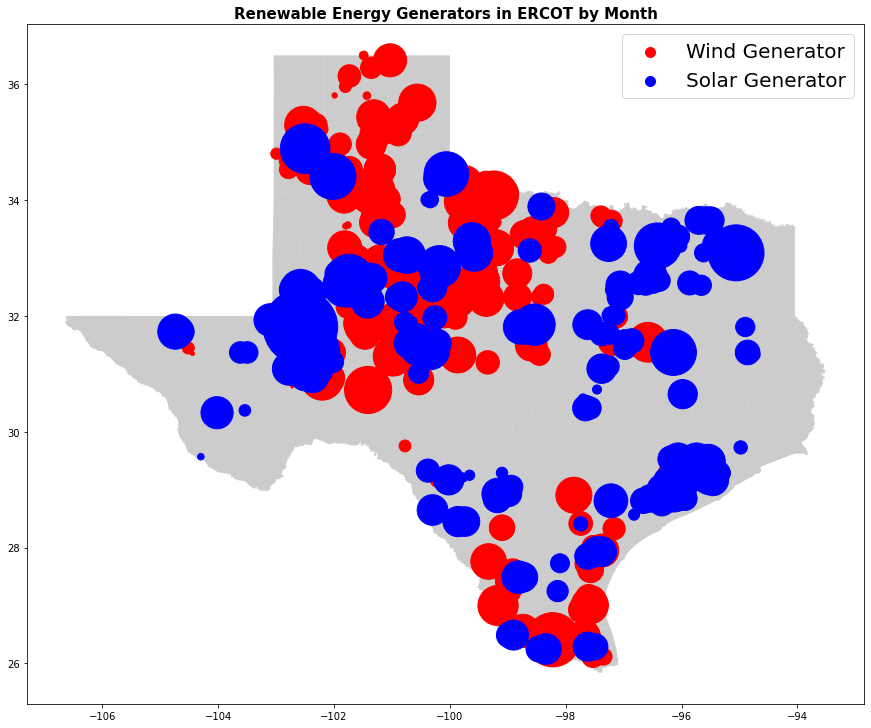

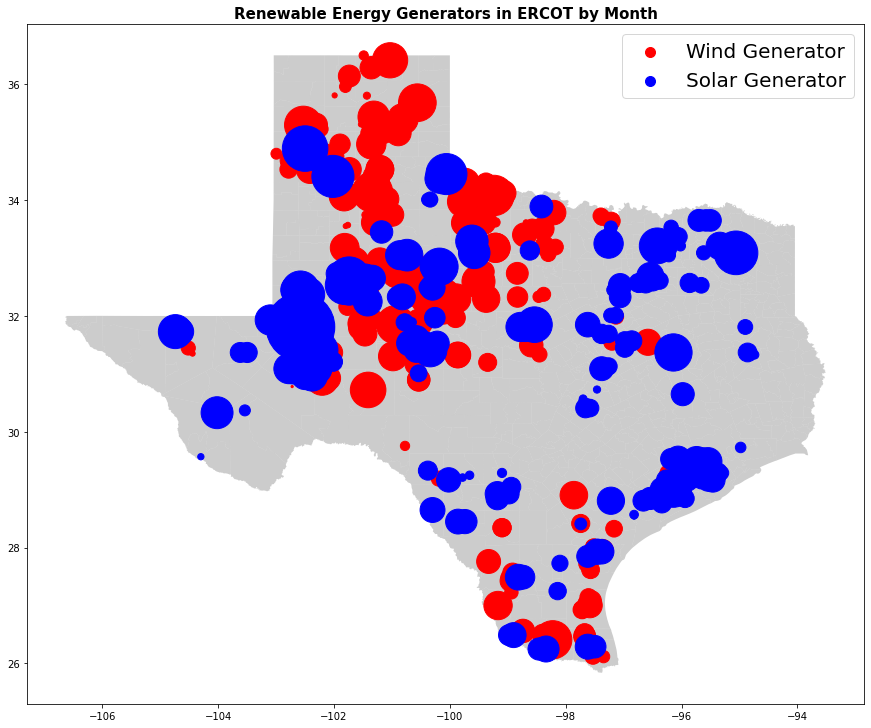

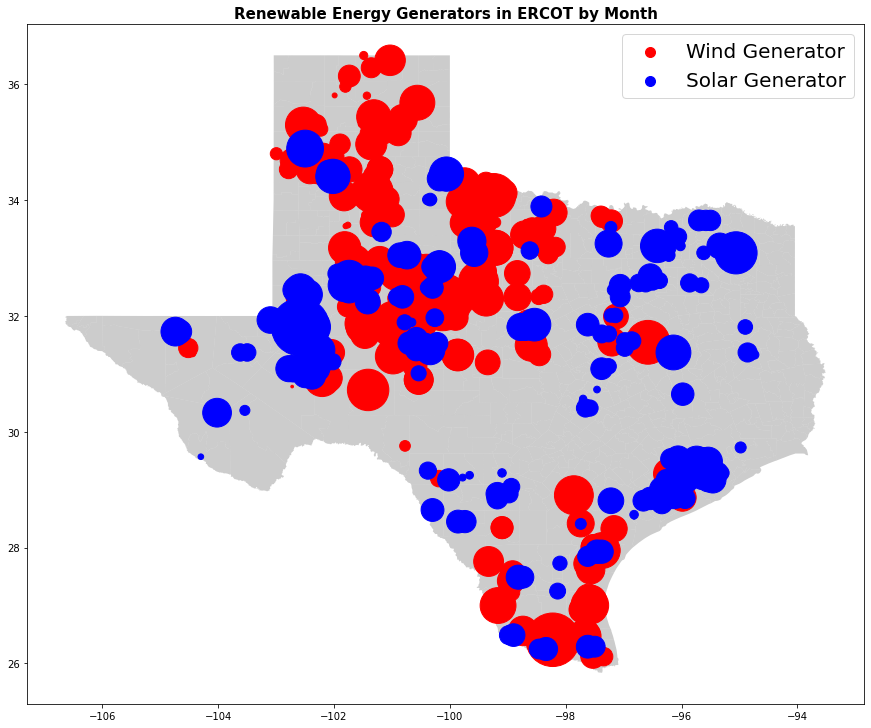

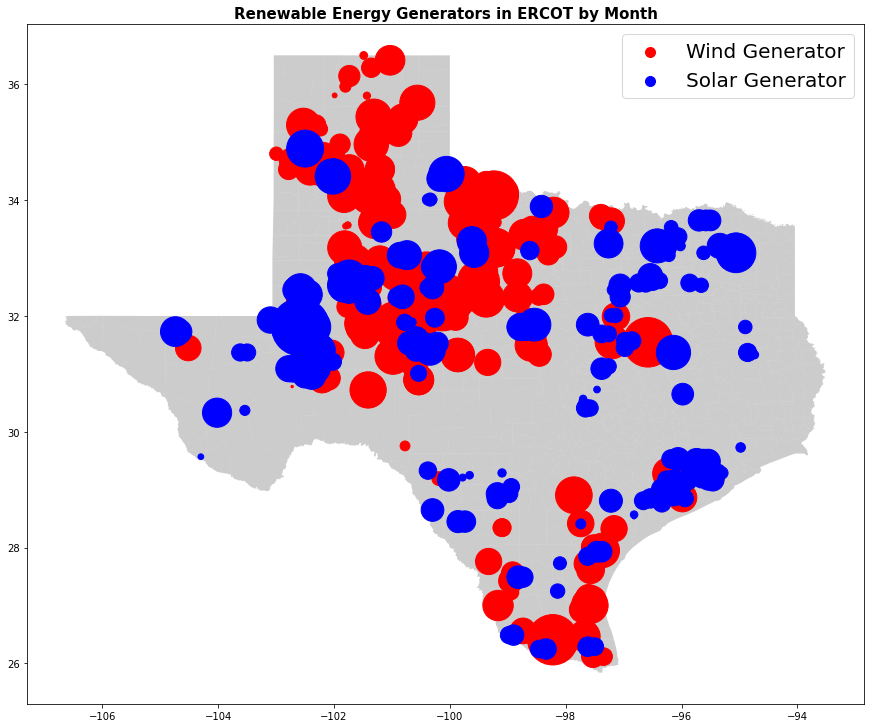

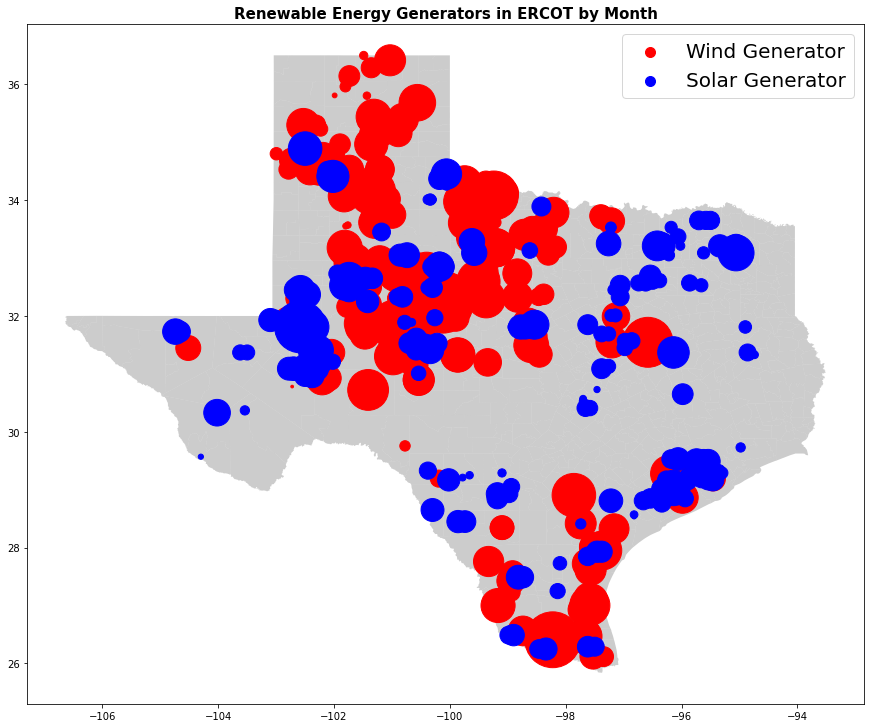

In [139]:
i = 0
for column in columns2:
    
    fig, ax = plt.subplots(figsize = (15,15))
    texas.plot(ax = ax, alpha = 0.4, color="grey")

    geo_wind1.plot(ax=ax, marker='o', color='red', markersize=geo_wind1[column], label="Wind Generator")
    geo_solar1.plot(ax=ax, marker='o', color='blue', markersize=geo_solar1[column], label="Solar Generator")

    plt.title('Renewable Energy Generators in ERCOT by Month', fontsize=15,fontweight='bold')


    #geo_wind_real['geometry'].plot(ax = ax, markersize = 20, color = "blue", marker="o", label= "Existing Wind Generator")
    #plt.legend(prop={'size':15})
    lgnd = plt.legend(scatterpoints=1, fontsize=20)
    for handle in lgnd.legendHandles:
        handle.set_sizes([100.0])
    plt.savefig(str(i)+png)
    i+=1